<a href="https://colab.research.google.com/github/zzaeyun/ESAA22-2/blob/main/Red_select_sounddesign_1929011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **2022-2 사운드 디자인 기말 과제 데이터 가공**
**1929011 김채윤** 

### **0. 데이터 불러오기**

In [110]:
import numpy as np
import pandas as pd

In [111]:
Red=pd.read_csv('/Red.csv')

In [112]:
Red.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


### **1. 데이터 살펴보기**

In [113]:
#데이터 형식과 NULL값 살펴보기
Red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB


- NULL값은 없으며 8개의 변수와 8666개의 관측치를 가지고 있음
- 하지만 twotone에서는 2000개의 관측치까지만 받고 있기 때문에 기준을 설정하여 관측치의 일부를 표본으로 추출해야 함

### **2. 변수 가공**

- Country: 문자열로 되어 있어 숫자형으로 변경하는 가공이 필요함

In [114]:
Red.Country.value_counts()

Italy            2650
France           2256
Spain            1142
South Africa      500
United States     374
Chile             326
Germany           248
Australia         246
Argentina         246
Portugal          230
Austria           220
New Zealand        63
Brazil             40
Romania            23
Lebanon            15
Israel             13
Greece             13
Switzerland        12
Hungary             9
Moldova             8
Slovenia            8
Turkey              6
Georgia             5
Uruguay             4
Croatia             2
Bulgaria            2
Canada              2
Mexico              1
China               1
Slovakia            1
Name: Country, dtype: int64

In [115]:
Red.replace({'Italy': 2650, 'France': 2256, 'Spain': 1142, 'South Africa': 500, 'United States': 374, 
             'Chile': 326, 'Germany': 248, 'Australia': 246, 'Argentina': 246, 'Portugal': 230,
             'Austria': 220, 'New Zealand': 63, 'Brazil': 40, 'Romania': 23, 'Lebanon': 15,
             'Israel': 13, 'Greece': 13, 'Switzerland': 12, 'Hungary': 9, 'Moldova': 8,
             'Slovenia': 8, 'Turkey': 6, 'Georgia': 5, 'Uruguay': 4, 'Croatia': 2,
             'Bulgaria': 2, 'Canada': 2, 'Mexico': 1, 'China': 1, 'Slovakia': 1}, inplace=True)

- Year: 연도가 숫자형이 아닌 문자형으로 저장되어 있으므로 숫자형 변수로 변경

In [116]:
Red.Year.value_counts()

2016    1776
2017    1558
2015    1396
2018    1099
2014     798
2013     564
2012     371
2011     278
2010     174
2005     154
2019     116
2009      84
2008      80
2006      44
2007      43
2004      27
2000      19
1999      15
2001      12
2003      11
N.V.       8
1997       7
2002       7
1998       6
1996       5
1995       4
1992       3
1990       2
1989       2
1993       1
1988       1
1991       1
Name: Year, dtype: int64

Year가 N.V.인 와인의 의미:

***Wines without a vintage date: Non-vintage wine is made by blending multiple years together. Non-vintage wines are known for their consistent, house style and are usually a good value. For example, a common non-vintage wine is Champagne labeled simply as “N.V.”***

In [117]:
Red[Red.Year=='N.V.']

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
197,Délicate N.V.,500,Stellenbosch,De Toren,4.1,1056,14.38,N.V.
282,Overture N.V.,374,Napa Valley,Opus One,4.4,10799,154.99,N.V.
943,Red Blend N.V.,326,Lontue Valley,Caballo Loco,4.4,13136,34.07,N.V.
2201,Cinquanta Collezione N.V.,2650,Vino d'Italia,San Marzano,4.3,19454,16.38,N.V.
2404,Limited Edition 10 Vendemmie N.V.,2650,Montepulciano d'Abruzzo,Tenuta Ulisse,4.6,2080,30.90,N.V.
4527,Lambrusco Reggiano Dolce N.V.,2650,Reggiano,Riunite,3.7,359,5.89,N.V.
4833,Little James' Basket Press Rouge N.V.,2256,Vin de France,Château de Saint Cosme,3.6,3818,7.90,N.V.
5632,Tre Autoctoni Evoluzione Notturnia N.V.,2650,Vino d'Italia,Farnese,3.7,461,7.75,N.V.


그렇다면 Non-vintage wine의 경우 year을 숫자로 정의하는 것이 불가능하므로 제외

In [118]:
NV_index=[197,282,943,2201,2404,4527,4833,5632]
Red.drop(NV_index, axis=0,inplace=True)

In [119]:
Red.Year=Red.Year.astype('int')

**추가 가공**

값이 3000이 넘는 관측치의 경우 twotone에서 price가 낮은 경우 구체적인 구별이 불가능 하여 이상치는 제거


In [120]:
Red[Red.Price>3000]

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
2344,Pomerol 2012,2256,Pomerol,Pétrus,4.7,204,3410.79,2012


In [121]:
Red.drop(2344,axis=0,inplace=True)

### **3. sample 선택**

- Price: 가격을 기준으로 하고 있으므로 분포를 살펴보고 관측치를 어떻게 선택할지 결정

Price 변수를 기준으로 정렬

In [122]:
Red.sort_values('Price', inplace=True)
Red.head(10)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
5423,Shiraz 2018,1142,Castilla,Costa Azul,3.2,44,3.55,2018
2938,Cal Y Canto Full Red 2018,1142,La Mancha,Isidro Milagro,3.1,25,3.70,2018
6408,Nero d'Avola 2018,2650,Terre Siciliane,Monte Pietroso,3.8,56,3.79,2018
108,Cabernet - Shiraz 2016,1142,La Mancha,Añoranza,3.4,103,3.95,2016
6869,Monterio Tempranillo 2016,1142,La Mancha,Bodegas Victorianas,3.2,622,3.99,2016
7821,Tempranillo Cariñena 2018,1142,Cariñena,Marques de Villanueva,3.7,79,3.99,2018
1057,Tempranillo 2015,1142,Castilla,Maximo,3.4,137,4.16,2015
4033,Cabernet Sauvignon 2018,326,Central Valley,Sierra Noble,3.8,32,4.25,2018
6127,Primo Sangiovese - Merlot 2018,2650,Daunia,Farnese,3.5,52,4.28,2018
2644,Crucillón 2018,1142,Campo de Borja,Bodegas Aragonesas,3.3,228,4.30,2018


(array([8.364e+03, 1.820e+02, 6.100e+01, 2.300e+01, 1.000e+01, 4.000e+00,
        7.000e+00, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([   3.55,  163.19,  322.83,  482.47,  642.11,  801.75,  961.39,
        1121.03, 1280.67, 1440.31, 1599.95]),
 <a list of 10 Patch objects>)

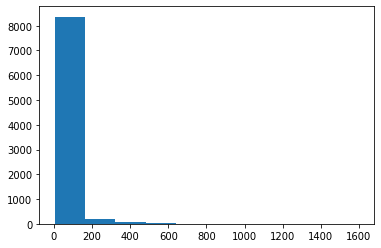

In [123]:
import matplotlib.pyplot as plt
plt.hist(Red.Price)

Price가 다양하게 존재할 수 있도록 히스토그램에서 기준으로 하고 있는 값을 사용하여 개수를 지정 

In [124]:
sum(Red.Price>344.274)

95

In [125]:
sum(Red.Price<344.274)

8562

8562개 중에 100개를 무작위 추출

In [126]:
Red_L=Red.iloc[8562:,:]
random_Red=np.random.randint(0,8562,100)
Red_R=Red.iloc[random_Red,:]
Red_R.sort_values('Price', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [127]:
Red_select=pd.concat([Red_R,Red_L])

### **4. 최종 dataset**

(array([98.,  2., 45., 23., 10.,  4.,  7.,  4.,  1.,  1.]),
 array([   4.75,  164.27,  323.79,  483.31,  642.83,  802.35,  961.87,
        1121.39, 1280.91, 1440.43, 1599.95]),
 <a list of 10 Patch objects>)

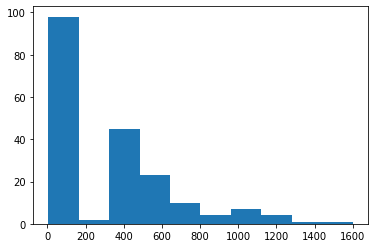

In [128]:
plt.hist(Red_select.Price)

In [129]:
Red_select.to_csv('/Red_select.csv', index = False)